# Tutorial 3: Querying Python API overview

# 1. Background

This tutorial is a brief overview of how to use the Python API for querying. For additional details please see the other tutorials.

The data consists of an index constructed from a *Salmonella enterica* dataset previously published in (https://doi.org/10.1128/jcm.02200-15) and prepared as described in **Tutorial 1**.

# 2. Getting data

Let's first download the data for this tutorial. The data (an example index) is available from <https://figshare.com/s/0405199820a13aedca42>.

For this Juptyer tutorial you can run the below commands to download.

*Note: In a Jupyter Python notebook, prepending a command with `!` runs the command in a shell instead of the Python interpreter (e.g., `!unzip` runs the command `unzip`).*

In [1]:
!wget -O salmonella-project.zip https://ndownloader.figshare.com/files/27771615?private_link=0405199820a13aedca42
!unzip -n salmonella-project.zip | head -n 3
!echo
!ls

--2021-06-08 15:52:06--  https://ndownloader.figshare.com/files/27771615?private_link=0405199820a13aedca42
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 52.16.102.173, 54.217.124.219, 2a05:d018:1f4:d000:b283:27aa:b939:8ed4, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|52.16.102.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4391727 (4.2M) [application/zip]
Saving to: ‘salmonella-project.zip’

salmonella-project. 100%[===================>]   4.19M   908KB/s    in 6.9s    

2021-06-08 15:52:13 (622 KB/s) - ‘salmonella-project.zip’ saved [4391727/4391727]

Archive:  salmonella-project.zip

salmonella-project	     tutorial-2-sars-cov-2.ipynb
salmonella-project.zip	     tutorial-3-querying-overview.ipynb
tutorial-1-salmonella.ipynb


Great. Now that we've got some data (in the `salmonella-project/` directory), let's explore querying the data using the Python API.



# 3. Basic querying with Python API

## 3.1. Print version

First let's import the Python library and print out the version so that we know which version of the Genomics Data Index we are working with.

In [2]:
import genomics_data_index

print(genomics_data_index.__version__)

0.2.0.dev0


If you see `.dev` this just means we are working with an in-development version of the code.

## 3.2. Connect to project

To perform queries of this data we first start out by connecting to our project in the `salmonella-project/` directory through `GenomicsDataIndex`.

In [3]:
import genomics_data_index.api as gdi

db = gdi.GenomicsDataIndex.connect('salmonella-project')
db

<GenomicsDataIndex(samples=59)>

Great. We're connected. The `samples=59` tells us how many samples are in this database. We can get this number as an integer in Python using the `count_samples()` method:

In [4]:
db.count_samples()

59

You can run `db.sample_names()` or `db.reference_names()` to list the samples and reference genomes in this database.

In [5]:
db.sample_names()

['SH09-29',
 'SH10-015',
 'SH12-001',
 'SH13-001',
 'SH14-003',
 'SH10-30',
 'SH14-010',
 'SH14-007',
 'SH12-013',
 'SH14-016',
 'SH14-021',
 'SH14-009',
 'SH12-003',
 'SH14-027',
 'SH11-001',
 'SH13-007',
 'SH14-001',
 'SH12-002',
 'SH14-002',
 'SH14-014',
 'SH14-005',
 'SH14-028',
 'SH14-008',
 'SH12-004',
 'SH13-004',
 'SH08-001',
 'SH10-002',
 'SH14-017',
 'SH14-015',
 'SH11-002',
 'SH13-008',
 'SH13-003',
 'SH10-014',
 'SH14-024',
 'SH14-011',
 'SH14-004',
 'SH12-008',
 'SH12-011',
 'SH14-018',
 'SH12-005',
 'SH12-010',
 'SH14-013',
 'SH14-026',
 'SH14-012',
 'SH12-006',
 'SH12-014',
 'SH13-005',
 'SH14-023',
 'SH14-025',
 'SH12-009',
 'SH14-006',
 'SH14-020',
 'SH13-002',
 'SH13-006',
 'SH12-007',
 'SH14-019',
 'SH14-022',
 'SH12-012',
 'SH10-001']

In [6]:
db.reference_names()

['S_HeidelbergSL476']

### 3.2.1. Python hints

If you notice, in Jupyter, the very last line gets printed out automatically as text. However, you can also call `print()` explicitly.

In [7]:
print(db.reference_names())

['S_HeidelbergSL476']


To print text alongside variables you can make use of [f-strings](https://realpython.com/python-f-strings/) in Python, where yo prepend a string with `f` and use `{}` notation to specify variables to print (e.g., `f'Literal string: {variable} more string {variable2}.'`.

In [8]:
print(f'The value of db.reference_names() is: {db.reference_names()}')

The value of db.reference_names() is: ['S_HeidelbergSL476']


You can use `type()` to see the type of a Python object (e.g., the class it belongs to or type for primitive types like int or float).

In [9]:
type(db.count_samples())

int

In [10]:
type(db.sample_names())

list

In [11]:
type(db.reference_names())

list

In [12]:
type(db)

genomics_data_index.api.query.GenomicsDataIndex.GenomicsDataIndex

Here, the type for `db` corresponds to the fully-qualified name for the class: <https://github.com/apetkau/genomics-data-index/blob/development/genomics_data_index/api/query/GenomicsDataIndex.py#L21>.

In Jupyter, you can see some help documentation for an object by using the `?` symbol. For example `?db`.

In [13]:
?db

Type:           GenomicsDataIndex
String form:    <GenomicsDataIndex(samples=59)>
File:           ~/miniconda3/envs/gdi/lib/python3.8/site-packages/genomics_data_index/api/query/GenomicsDataIndex.py
Docstring:      The root class for the Python API. Used to connect to a genomics index and build query objects.
Init docstring:
Builds a new GenomicsDataIndex.
:param connection: The database connection to use.

:return: A new GenomicsDataIndex.


In [14]:
?db.count_samples

Signature: db.count_samples() -> 'int'
Docstring:
Counts the samples stored in this genomics index.

:return: The count of samples stored in this genomics index.
File:      ~/miniconda3/envs/gdi/lib/python3.8/site-packages/genomics_data_index/api/query/GenomicsDataIndex.py
Type:      method


In [15]:
?db.sample_names

Signature: db.sample_names() -> 'List[str]'
Docstring:
Gets a list of all sample names stored in this index.

:return: A list of all sample names stored in this index.
File:      ~/miniconda3/envs/gdi/lib/python3.8/site-packages/genomics_data_index/api/query/GenomicsDataIndex.py
Type:      method


In [16]:
?db.reference_names

Signature: db.reference_names() -> 'List[str]'
Docstring:
Gets a list of the names of the reference genomes used in this index.
:return: A list of all reference genome names.
File:      ~/miniconda3/envs/gdi/lib/python3.8/site-packages/genomics_data_index/api/query/GenomicsDataIndex.py
Type:      method


Other IDE's may display help documentation differently (or you can also refer to the source <https://github.com/apetkau/genomics-data-index/blob/development/genomics_data_index/api/query/GenomicsDataIndex.py>).

## 3.3. List all features (mutations)

To list a summary of all indexed mutations we can use `db.mutations_summary()`.

You have to specify a reference genome name (`S_HeidelbergSL476`) that is used to define the coordinates of mutations.

In [17]:
db.mutations_summary(reference_genome='S_HeidelbergSL476')

,Sequence,Position,Deletion,Insertion,Count
Mutation,,,,,
gi|194447306|ref|NC_011083.1|:34780:A:G,gi|194447306|ref|NC_011083.1|,34780,A,G,3
gi|194447306|ref|NC_011083.1|:43651:G:T,gi|194447306|ref|NC_011083.1|,43651,G,T,1
gi|194447306|ref|NC_011083.1|:58804:T:A,gi|194447306|ref|NC_011083.1|,58804,T,A,10
gi|194447306|ref|NC_011083.1|:63393:C:A,gi|194447306|ref|NC_011083.1|,63393,C,A,13
gi|194447306|ref|NC_011083.1|:70519:T:TG,gi|194447306|ref|NC_011083.1|,70519,T,TG,6
...,...,...,...,...,...
gi|194447306|ref|NC_011083.1|:4860641:G:A,gi|194447306|ref|NC_011083.1|,4860641,G,A,57
gi|194447306|ref|NC_011083.1|:4876176:A:G,gi|194447306|ref|NC_011083.1|,4876176,A,G,58
gi|194447306|ref|NC_011083.1|:4882099:C:T,gi|194447306|ref|NC_011083.1|,4882099,C,T,57


These results are displayed as a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) used to store and manipulate tabular data in-memory.

In [18]:
type(db.mutations_summary(reference_genome='S_HeidelbergSL476'))

pandas.core.frame.DataFrame

For now, I'm using this table as a way to get specific strings used to uniquely name a mutation for queries below.

## 3.4. Initiate a query

We can initiate a query using the `db.samples_query()` method.

In [19]:
q = db.samples_query()
q

<SamplesQueryIndex[100% (59/59) samples]>

### 3.4.1. Number of selected samples

We can use the `len()` function to get the number of currently-selected samples in the query.

In [20]:
len(q)

59

Selected samples are all with respect to some **universe** of total samples, which is useful for complement operations, etc. You can get the number of samples in the universe by applying `len()` to the `universe_set`.

In [21]:
len(q.universe_set)

59

## 3.5. Search for a particular mutation (`hasa()`)

Once we have a query initiated we can search for genomic samples containing particular mutation by using the `hasa()` method.

In [22]:
q2 = q.hasa('gi|194447306|ref|NC_011083.1|:63393:C:A', kind='mutation')
q2

<SamplesQueryIndex[22% (13/59) samples]>

The `hasa()` method can be read as "select samples that **have a** this particular mutation". The selected samples is printed above (13/59 have this particular mutation).

*Note: the default **kind** for `hasa()` is `mutation` so you can leave out `kind='mutation'` if you wish.*

In [23]:
q2 = q.hasa('gi|194447306|ref|NC_011083.1|:63393:C:A')
q2

<SamplesQueryIndex[22% (13/59) samples]>

## 3.6. Showing selected samples

Once we have a particular set of samples selected we can use the `tolist()` method to print out a list of the selected sample names.

In [24]:
q2.tolist()

['SH12-001',
 'SH12-003',
 'SH11-001',
 'SH12-002',
 'SH12-004',
 'SH12-008',
 'SH12-011',
 'SH12-005',
 'SH12-010',
 'SH12-006',
 'SH12-009',
 'SH12-007',
 'SH10-001']

Or, we can use the `summary()` method to produce a summary of the selected samples.

In [25]:
q2.summary()

,Query,Present,Absent,Unknown,Total,% Present,% Absent,% Unknown
0,gi|194447306|ref|NC_011083.1|:63393:C:A,13,46,<NA>,59,22.033898,77.966102,<NA>


Or we can use the `toframe()` method to show the selected samples as a dataframe (table).

In [26]:
q2.toframe()

,Query,Sample Name,Sample ID,Status
0,gi|194447306|ref|NC_011083.1|:63393:C:A,SH12-001,3,Present
1,gi|194447306|ref|NC_011083.1|:63393:C:A,SH12-003,13,Present
2,gi|194447306|ref|NC_011083.1|:63393:C:A,SH11-001,15,Present
3,gi|194447306|ref|NC_011083.1|:63393:C:A,SH12-002,18,Present
4,gi|194447306|ref|NC_011083.1|:63393:C:A,SH12-004,24,Present
5,gi|194447306|ref|NC_011083.1|:63393:C:A,SH12-008,37,Present
6,gi|194447306|ref|NC_011083.1|:63393:C:A,SH12-011,38,Present
7,gi|194447306|ref|NC_011083.1|:63393:C:A,SH12-005,40,Present
8,gi|194447306|ref|NC_011083.1|:63393:C:A,SH12-010,41,Present
9,gi|194447306|ref|NC_011083.1|:63393:C:A,SH12-006,45,Present


## 3.7. Chaining queries

Queries can be chained together to select samples that match every criteria given in the `has()` method.

In [27]:
q3 = q.hasa('gi|194447306|ref|NC_011083.1|:63393:C:A').hasa('gi|194447306|ref|NC_011083.1|:58804:T:A')
q3

<SamplesQueryIndex[17% (10/59) samples]>

This can be read as "select all samples that **have a** 63393 C to A mutation **AND** select all samples that **have a** 58804 T to A mutation".

## 3.8 Searching for a particular sample (`isa()` and `isin()`)

The `isa()` and `isin()` methods let us search for particular samples by name. The difference between the two is that:

1. `isa()` is meant to be read "select samples that **are** (**is a**) type matching the expression.
2. `isin()` is meant to be read "select samples that are **in** a set defined by the passed criteria.

The differences between these become more apparent for more advanced queries later on. For now, we can use these to select samples by name.

In [28]:
q4 = q.isa('SH12-001')
q4

<SamplesQueryIndex[2% (1/59) samples]>

In [29]:
q5 = q.isin(['SH12-001', 'SH13-001'])
q5

<SamplesQueryIndex[3% (2/59) samples]>

# 4. Searching within a tree

Queries are not limited to what mutations a sample has or by sample name. We can also use `isin()` to select samples that match criteria related to a phylogenetic tree.

## 4.1. Initiate query with attached tree

To do this, we must specify that our query has a tree attached to it. The example data for this tutorial does have such a tree.

In [30]:
t = db.samples_query(universe='mutations', reference_name='S_HeidelbergSL476')
t

<MutationTreeSamplesQuery[100% (59/59) samples]>

Here, the type of query is a `MutationTreeSamplesQuery` which means it has a tree attached to it. You can access the underlying tree object by using the `tree` property).

In [31]:
type(t.tree)

ete3.coretype.tree.TreeNode

To visualize the tree, you can render the tree as an image using the `tree_styler()` and `render()` methods:

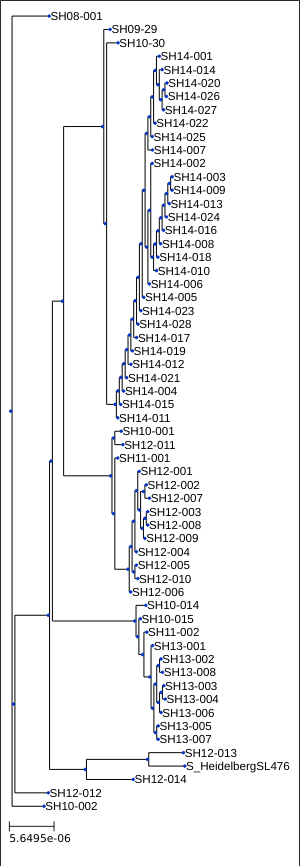

In [32]:
t.tree_styler().render(w=300)

## 4.2. Searching by distance

Now that we have a phylogenetic tree, we can search using this tree with `isin()`. To do this, let's search for samples within some distance from `SH14-001`.

In [33]:
tdist = t.isin('SH14-001', kind='distance', distance=3e-7, units='substitutions/site')
tdist

<MutationTreeSamplesQuery[8% (5/59) samples]>

This selects a subset of samples within the above distance (given in `'substitutions/site'`, you can also use `units='substitutions'`).

It can be hard to see what is going on, so we can combine our query with the tree visualization using the `highlight()` method to highlight the selected samples in the tree.

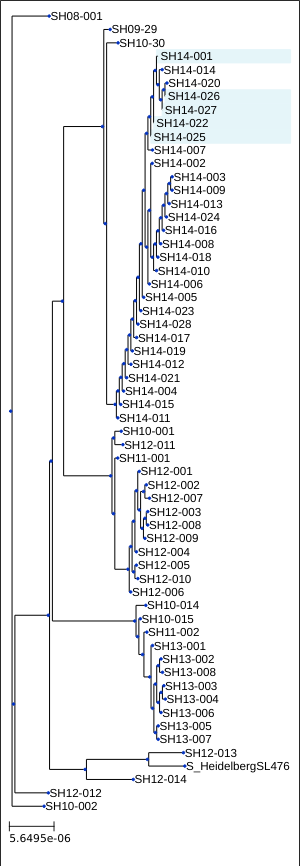

In [34]:
t.tree_styler().highlight(tdist).render(w=300)

## 4.3. Searching by most recent common ancestor

Another type of query instead of distance is `mrca` which selects samples that all share a particular most recent common ancestor.

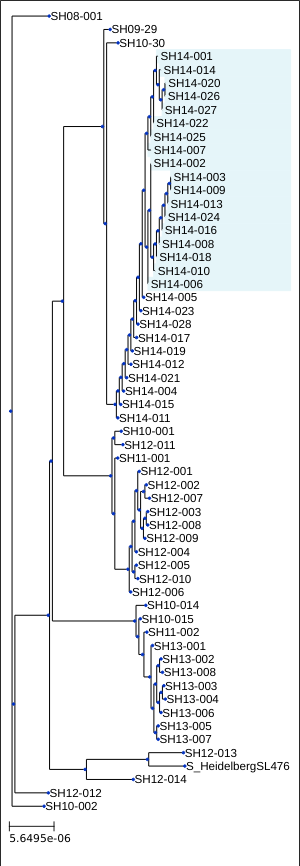

In [35]:
tmrca = t.isin(['SH14-001', 'SH14-002'], kind='mrca')
t.tree_styler().highlight(tmrca).render(w=300)

To better visualize how this works, let's combine with another query to select and highlight those samples we are looking for the ancestors to.

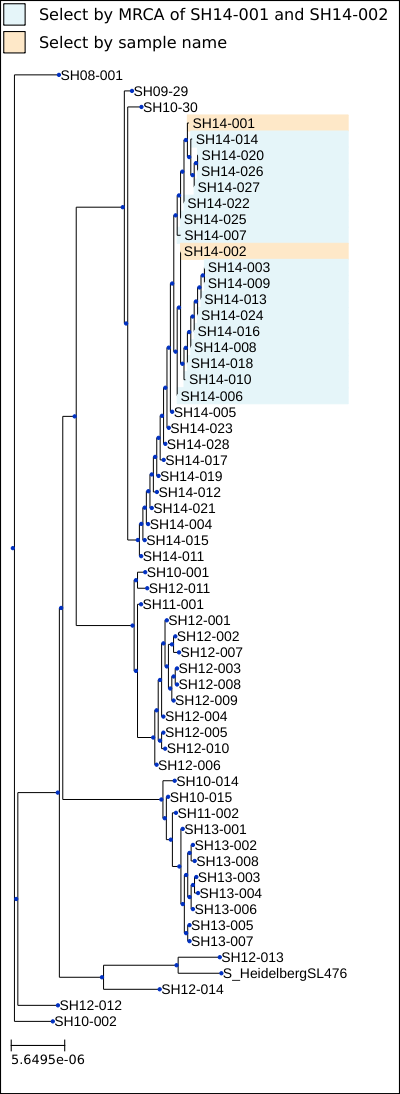

In [36]:
# I use '\' in Python to split a single line of code across multiple lines (since whitespace matters in Python)
t.tree_styler()\
    .highlight(t.isin(['SH14-001', 'SH14-002'], kind='mrca'), legend_label='Select by MRCA of SH14-001 and SH14-002')\
    .highlight(t.isin(['SH14-001', 'SH14-002'], kind='samples'), legend_label='Select by sample name')\
    .render(w=400)

So here, the samples highlighted in orange are SH14-001 and SH14-002. The query `t.isin(['SH14-001', 'SH14-002'], kind='mrca')` is used to select all those samples that share a most recent common ancestor to SH14-001 and SH14-002 (shown in green).

# 5. Attach external metadata

So far we've been looking at only the genomics data. But often times many details insights can be derived from the associated metadata with the genomic samples. External metadata can be attached and tracked by our queries (e.g., data from `csv` files or from external databases).

To attach external metadata we first must load it up in Python as a DataFrame (note `head(3)` just means only print the first 3 rows, which avoids printing a very large table for this tutorial).

## 5.1. Load external metadata

First we load some external data in a `tsv` file (tab-delimited file). We use [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for this.

In [37]:
import pandas as pd

metadata_df = pd.read_csv('salmonella-project/metadata.tsv', sep='\t', dtype=str)
metadata_df.head(3)

,Strain,Source,Isolation date,Outbreak number,PFGE pattern,PT,Canadian PFGE pattern
0,SH12-001,Human,05-2012,1,2,19,SHXAI.0001/SHBNI.0001
1,SH12-002,Human,05-2012,1,2,19,SHXAI.0001/SHBNI.0001
2,SH12-003,Human,05-2012,1,2,19,SHXAI.0001/SHBNI.0001


## 5.2. Join metdata to query

Now we can attach to our query using the `join()` method:

In [38]:
# Setup a new query (you don't have to do this, but this makes sure the results are all as expected in the tutorial)
q = db.samples_query().hasa('gi|194447306|ref|NC_011083.1|:4860641:G:A')

# Join our query with the given data frame
q = q.join(metadata_df, sample_names_column='Strain')
q

<DataFrameSamplesQuery[97% (57/59) samples]>

To join we had to define a column containing the sample names (the column `Strain` in this case). We now get back a query of type `DataFrameSamplesQuery`.

In [39]:
type(q)

genomics_data_index.api.query.impl.DataFrameSamplesQuery.DataFrameSamplesQuery

## 5.3. Selecting by column values using `isa()`

We can now use the `isa()` method to select samples by values in a particular metadata column. For example, to select all samples with a **Source** of `Food` we can use:

In [40]:
q.isa('Food', isa_column='Source', kind='dataframe')

<DataFrameSamplesQuery[31% (18/59) samples]>

You can also pass `regex=True` to `isa()` to query by a regex.

In [41]:
q.isa('.*oo.*', regex=True, isa_column='Source', kind='dataframe')

<DataFrameSamplesQuery[31% (18/59) samples]>

## 5.4. Metadata joined to selected samples

One useful component of joining a metadata table to the query is we can query for particular samples, and then export out both a list of those samples as well as any joined metadata in a single table (where each row is a single sample). To do this we use the `toframe()` method.

In [42]:
q.isa('Food', isa_column='Source', kind='dataframe').toframe()

,Query,Sample Name,Sample ID,Status,Strain,Source,Isolation date,Outbreak number,PFGE pattern,PT,Canadian PFGE pattern
0,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH12-009,50,Present,SH12-009,Food,05-2012,1,2,19,SHXAI.0001/SHBNI.0001
1,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH12-010,41,Present,SH12-010,Food,05-2012,1,2,19,SHXAI.0001/SHBNI.0001
2,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH14-013,42,Present,SH14-013,Food,08-2014,3,2,19,SHXAI.0001/SHBNI.0001
3,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH14-014,20,Present,SH14-014,Food,08-2014,3,2,19,SHXAI.0001/SHBNI.0001
4,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH14-015,29,Present,SH14-015,Food,08-2014,3,2,19,SHXAI.0001/SHBNI.0001
5,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH14-016,10,Present,SH14-016,Food,08-2014,3,2,19,SHXAI.0001/SHBNI.0001
6,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH14-017,28,Present,SH14-017,Food,08-2014,3,2,19,SHXAI.0001/SHBNI.0001
7,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH14-018,39,Present,SH14-018,Food,08-2014,3,2,19,SHXAI.0001/SHBNI.0001
8,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH14-019,56,Present,SH14-019,Food,08-2014,3,2,19,SHXAI.0001/SHBNI.0001
9,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH14-020,52,Present,SH14-020,Food,08-2014,3,2,19,SHXAI.0001/SHBNI.0001


If you look through this table and find the **Source** column you will see that it only contains *Food* (meaning the bacterial genomes were all derived from bacteria isolated from Food products).

If instead you switched to `isa('Human')` you would see only those samples (rows in a table) where **Source** contains *Human*.

In [43]:
q.isa('Human', isa_column='Source', kind='dataframe').toframe()

,Query,Sample Name,Sample ID,Status,Strain,Source,Isolation date,Outbreak number,PFGE pattern,PT,Canadian PFGE pattern
0,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH12-001,3,Present,SH12-001,Human,05-2012,1,2,19,SHXAI.0001/SHBNI.0001
1,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH12-002,18,Present,SH12-002,Human,05-2012,1,2,19,SHXAI.0001/SHBNI.0001
2,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH12-003,13,Present,SH12-003,Human,05-2012,1,2,19,SHXAI.0001/SHBNI.0001
3,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH12-004,24,Present,SH12-004,Human,05-2012,1,2,19,SHXAI.0001/SHBNI.0001
4,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH12-005,40,Present,SH12-005,Human,05-2012,1,2,19,SHXAI.0001/SHBNI.0001
5,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH12-006,45,Present,SH12-006,Human,05-2012,1,2,19,SHXAI.0001/SHBNI.0001
6,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH12-007,55,Present,SH12-007,Human,05-2012,1,2,19,SHXAI.0001/SHBNI.0001
7,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH12-008,37,Present,SH12-008,Human,05-2012,1,2,19,SHXAI.0001/SHBNI.0001
8,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH13-001,4,Present,SH13-001,Human,11-2013,2,2,26,SHXAI.0001/SHBNI.0001
9,gi|194447306|ref|NC_011083.1|:4860641:G:A AND ...,SH13-002,53,Present,SH13-002,Human,11-2013,2,2,26,SHXAI.0001/SHBNI.0001


# 6. End

Congratulations. You've made it to the end of this tutorial. You are amazing 😀🥳❤️. Way to go. I hope you enjoyed it.